In [1]:
import sklearn

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

Lets load and visualize the dataset

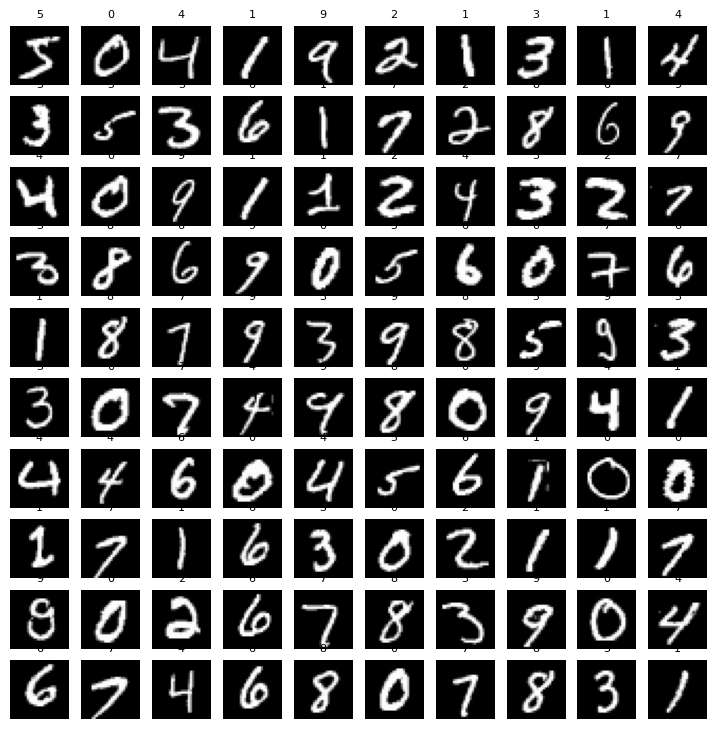

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

plt.figure(figsize=(9, 9))
for idx in range(100):
    plt.subplot(10, 10, idx + 1)
    plt.imshow(X[idx].reshape(28, 28), cmap="gray")
    plt.title(y[idx], fontsize=8)
    plt.axis("off")

plt.show()

In [ ]:
#Lets Study Binary Classification SGDClassifier

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary classification: 5 vs Not 5
y_5 = (y == 5)

“We convert this into a binary problem: True if the digit is 5, otherwise False.” Now we will train SGD Classifier.
SGD classifier : It is a linear classifier trained using Stochastic Gradient Descent, where the model updates its weights using one sample at a time.


In [12]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y_5)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


	•	True → model thinks it’s 5
	•	False → model thinks it’s not 5

In [13]:
sgd_clf.predict([X[0]])

array([ True])

Lets Verify if its actually 5

In [14]:
y[0]

np.int64(5)

Check accuracy

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X, y_5,  scoring="accuracy")

array([0.96871429, 0.96371429, 0.94642857, 0.95328571, 0.95757143])

This ~95% accuracy is misleading, why? Because only ~10% of MNIST digits are 5. A bad classifier that always predicts “not 5” would get ~90%+ accuracy. Thats why other evaluation matrices are used.

In [19]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary labels: 5 vs not 5
y_5 = (y == 5)

# Train classifier
sgd_clf = SGDClassifier(random_state=42)

# Cross-validated predictions
y_pred = cross_val_predict(sgd_clf, X, y_5, cv=3)

“We use cross-validation so that predictions are made on unseen data.”

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_5, y_pred)

array([[61910,  1777],
       [ 1073,  5240]])

Confusion Matrix
[ TN   FP ]
[ FN   TP ]
TN =  Actual digit is NOT 5 AND model predicts NOT 5
FP =  Actual digit is NOT 5 BUT model predicts 5
FN = Actual digit IS 5 BUT model predicts NOT 5
TP = Actual digit is 5 AND model predicts 5

In [21]:
from sklearn.metrics import precision_score

precision_score(y_5, y_pred)

0.7467578737352145

Precision = “Out of all images predicted as 5, how many were actually 5?”

In [22]:
from sklearn.metrics import recall_score

recall_score(y_5, y_pred)

0.8300332646919056

Recall = “Out of all actual 5s, how many did the model correctly find?”

In [23]:
from sklearn.metrics import f1_score

f1_score(y_5, y_pred)

0.7861965491372843

“F1-score is the harmonic mean (hm= (2*ab)/a+b) of precision and recall. It balances between precision and recall.” 
In Short :
	•	Accuracy → “How often am I right?”
	•	Precision → “When I say yes, am I right?”
	•	Recall → “Did I miss anything important?”
	•	F1 → “Did I balance both properly?”

Lets plot Precision–Recall Curve & for that we need decission scores, Precision–Recall curves need scores, not predictions.

In [29]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary labels: 5 vs not 5
y_5 = (y == 5)

# Train classifier
sgd_clf = SGDClassifier(random_state=42)

# Get decision scores using cross-validation
y_scores = cross_val_predict(
    sgd_clf, X, y_5, cv=3, method="decision_function"
)

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_5, y_scores)

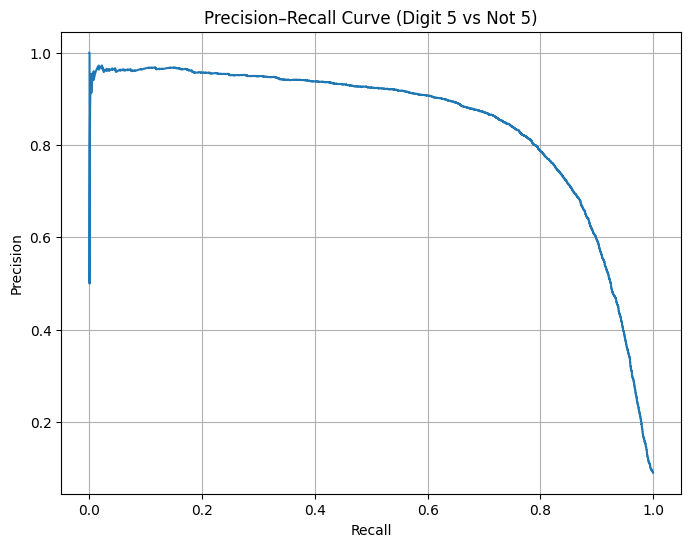

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Digit 5 vs Not 5)")
plt.grid(True)
plt.show()

Explaination of the curve :
	•	Left side:
                    High precision, low recall
                    → Model is very strict about predicting 5
	•	Right side:
                    High recall, low precision
                    → Model predicts many 5s, including wrong ones
	•	Trade-off:
                    Increasing recall usually decreases precision

Now lets see ROC Curve

In [32]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary labels: 5 vs not 5
y_5 = (y == 5)

# Train classifier
sgd_clf = SGDClassifier(random_state=42)

# Cross-validated decision scores
y_scores = cross_val_predict(
    sgd_clf, X, y_5, cv=3, method="decision_function"
)

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_5, y_scores)

	•	FPR → False Positive Rate
	•	TPR → True Positive Rate (Recall)

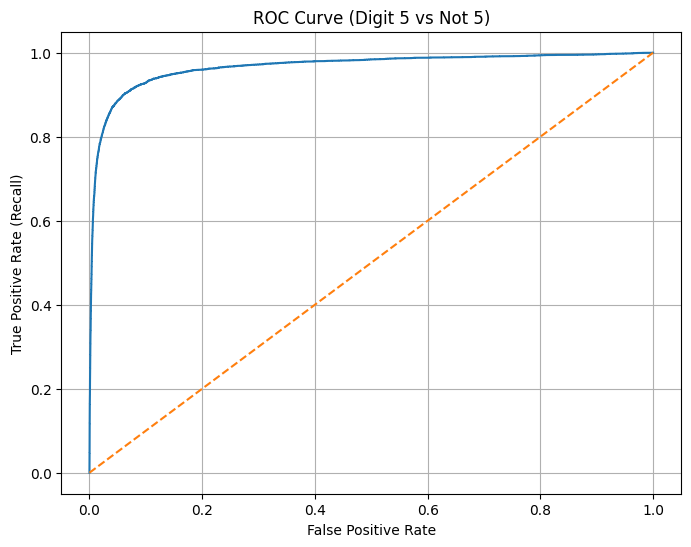

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve (Digit 5 vs Not 5)")
plt.grid(True)
plt.show()

Explaination of the ROC curve :
	•	X-axis (FPR) → How many non-5 digits are wrongly predicted as 5
	•	Y-axis (TPR) → How many actual 5s are correctly detected
	•	Diagonal line → Random guessing
	•	Closer to top-left → Better classifier
In short " ROC curve shows the trade-off between true positives and false positives."


Random Forrst : It is an ensemble learning algorithm that combines many decision trees to make more accurate and stable predictions.

In [35]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Binary labels
y_5 = (y == 5)

# Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X, y_5)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [36]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(rf_clf, X, y_5, cv=5, scoring="accuracy")
accuracy_scores

array([0.9895    , 0.9895    , 0.98792857, 0.98742857, 0.98742857])

In [37]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_rf = cross_val_predict(rf_clf, X, y_5, cv=3)

confusion_matrix(y_5, y_pred_rf)

array([[63638,    49],
       [  806,  5507]])

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_5, y_pred_rf))
print("Recall:", recall_score(y_5, y_pred_rf))
print("F1-score:", f1_score(y_5, y_pred_rf))

Precision: 0.9911807055435565
Recall: 0.8723269444004436
F1-score: 0.9279636026623979


MultiClass Classification :
Before we did 5 or not 5 now Classify handwritten digits into 10 classes (0–9)
SVC (Support Vector Classifier). 

In [39]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)


SVMs are distance-based, so scaling is mandatory.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.svm import SVC

svc_clf = SVC(
    kernel="rbf",      # non-linear
    gamma="scale",
    random_state=42
)

svc_clf.fit(X_scaled, y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


kernel = "rbf"  → Radial Basis Function

Adds non-linearity to the model
RBF kernel helps SVM draw curved decision boundaries.

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_clf, X_scaled, y, cv=3, scoring="accuracy")
scores

array([0.96134396, 0.95932799, 0.96412806])

In [43]:
scores.mean()

np.float64(0.9616000036577437)

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(svc_clf, X_scaled, y, cv=3)

confusion_matrix(y, y_pred)

array([[6782,    4,   23,    6,    5,   16,   34,   13,   18,    2],
       [   1, 7745,   50,   12,   10,    1,    9,   23,   14,   12],
       [  22,   19, 6734,   44,   28,    5,   16,   71,   43,    8],
       [   4,   16,  105, 6753,    5,   71,    3,   91,   71,   22],
       [   5,    9,   62,    2, 6564,    8,   28,   27,   13,  106],
       [  17,   11,   26,   84,   19, 5998,   63,   46,   31,   18],
       [  24,    9,   50,    1,   16,   44, 6685,   30,   17,    0],
       [  10,   32,   68,   13,   43,    1,    0, 7033,    5,   88],
       [  19,   42,   54,   58,   25,   60,   25,   43, 6472,   27],
       [  16,   14,   45,   59,   89,   16,    1,  144,   28, 6546]])

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6903
           1       0.98      0.98      0.98      7877
           2       0.93      0.96      0.95      6990
           3       0.96      0.95      0.95      7141
           4       0.96      0.96      0.96      6824
           5       0.96      0.95      0.96      6313
           6       0.97      0.97      0.97      6876
           7       0.94      0.96      0.95      7293
           8       0.96      0.95      0.96      6825
           9       0.96      0.94      0.95      6958

    accuracy                           0.96     70000
   macro avg       0.96      0.96      0.96     70000
weighted avg       0.96      0.96      0.96     70000



KNN – Binary Classification (Digit 5)

In [46]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

y_5 = (y == 5)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

“KNN relies on distance, so unscaled features give wrong neighbors.”

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance"   # closer neighbors matter more
)

knn_clf.fit(X_scaled, y_5)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [49]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(
    knn_clf, X_scaled, y_5, cv=5, scoring="accuracy"
)

accuracy_scores

array([0.98785714, 0.98778571, 0.98457143, 0.98678571, 0.988     ])

	•	k=5 → look at 5 nearest neighbors
	•	Distance-weighted voting improves stability

In [50]:
accuracy_scores.mean()

np.float64(0.9870000000000001)

Confusion Matix

In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_knn = cross_val_predict(knn_clf, X_scaled, y_5, cv=3)

confusion_matrix(y_5, y_pred_knn)

array([[63316,   371],
       [  569,  5744]])

Precision, Recall, F1-score

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_5, y_pred_knn))
print("Recall:", recall_score(y_5, y_pred_knn))
print("F1-score:", f1_score(y_5, y_pred_knn))

Precision: 0.9393295175797219
Recall: 0.9098685252653255
F1-score: 0.92436433859028
